## <center>CITS5508 Lab sheet 2: Classification on Forest types</center>

**Name: Ruan Scheepers**<br>
**Student number: 21980258**<br>
**Date created:** March 13th 2019<br>
**Last modified:** March 22nd 2019<br>



## Task 1: Analysing the Data

This section will read in the data. The first few lines will be displayed to see the features (columns) provided. Small analysis will be made on these features to get an overview of the data.

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot the figures for visualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



### Get the data

In [2]:
import pandas as pd

## functions to retrieve the two data sets
def load_testing():
    csv_path = os.path.join("testing.csv")
    return pd.read_csv(csv_path)

def load_training():
    csv_path = os.path.join("training.csv")
    return pd.read_csv(csv_path)

In [3]:
training_data = load_training() ##load the training data
training_data.head() ##confirm the load was successful and view the columns

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [4]:
testing_data = load_testing()
testing_data.head()##confirm the load was successful and view the columns

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
class                  198 non-null object
b1                     198 non-null int64
b2                     198 non-null int64
b3                     198 non-null int64
b4                     198 non-null int64
b5                     198 non-null int64
b6                     198 non-null int64
b7                     198 non-null int64
b8                     198 non-null int64
b9                     198 non-null int64
pred_minus_obs_H_b1    198 non-null float64
pred_minus_obs_H_b2    198 non-null float64
pred_minus_obs_H_b3    198 non-null float64
pred_minus_obs_H_b4    198 non-null float64
pred_minus_obs_H_b5    198 non-null float64
pred_minus_obs_H_b6    198 non-null float64
pred_minus_obs_H_b7    198 non-null float64
pred_minus_obs_H_b8    198 non-null float64
pred_minus_obs_H_b9    198 non-null float64
pred_minus_obs_S_b1    198 non-null float64
pred_minus_obs_S_b2    198 non-nul

In [6]:
##get an overview of the features' properties such as mean,std,range ect.
training_data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162,50.818889,...,-5.594141,-20.037576,-1.007121,-4.355657,-20.996919,-0.973737,-4.597626,-18.840000,-1.570808,-4.155859
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158,12.842321,...,9.769193,4.948562,1.783671,2.352311,6.490763,0.702619,1.736712,5.251095,1.807792,1.982423
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000,7.660000,...,-53.530000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000,40.667500,...,-6.627500,-23.325000,-1.860000,-5.790000,-24.090000,-1.290000,-5.747500,-22.237500,-2.370000,-5.122500
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000,53.030000,...,-2.255000,-20.020000,-0.970000,-4.350000,-20.465000,-0.945000,-4.540000,-19.200000,-1.420000,-4.125000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000,59.920000,...,0.247500,-17.787500,-0.042500,-2.882500,-17.955000,-0.642500,-3.617500,-16.227500,-0.655000,-3.105000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000,83.320000,...,5.740000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


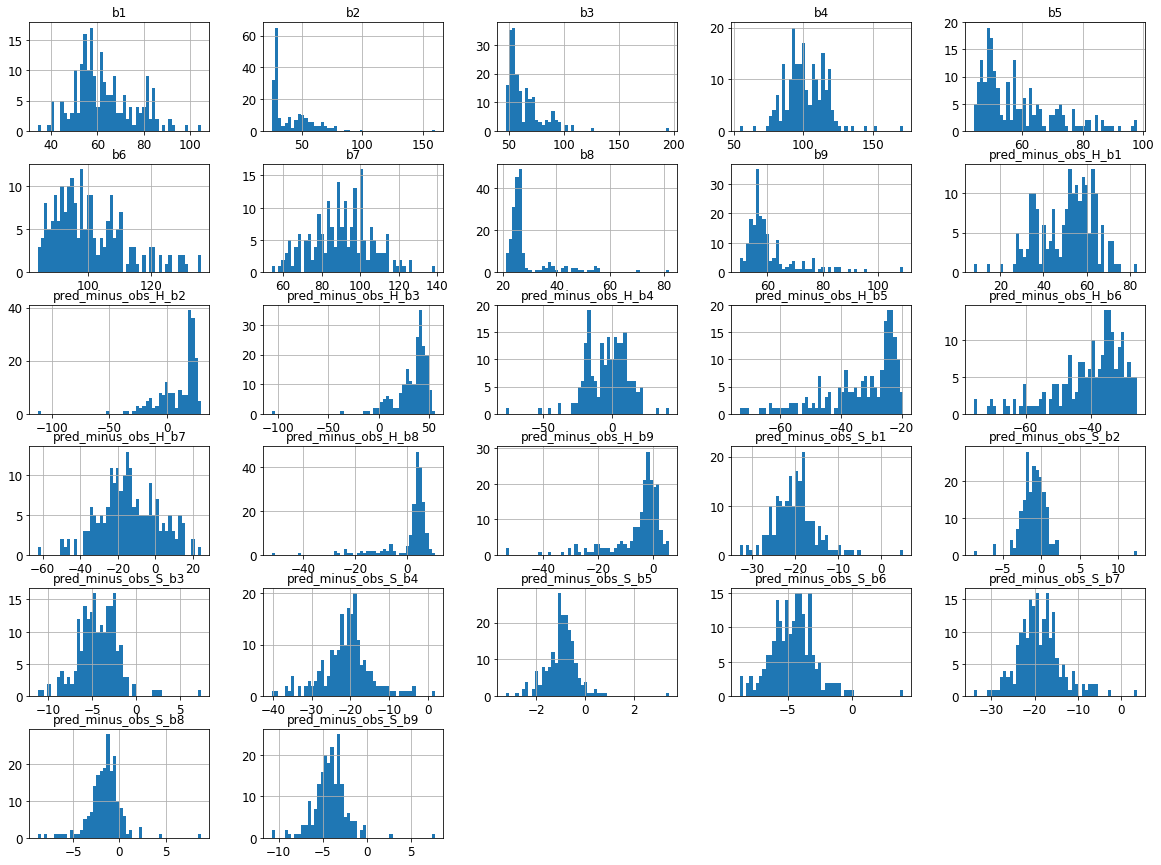

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
training_data.hist(bins=50, figsize=(20,15))
plt.show()

## Analysis of data:

Looking at the data we can see a varied mean and standard devaition, we will have to normalise the data. The training data has all 'non-null' values no steps to replace those values are required. All our features (except the classes) are numerical, this is good we dont have to transfrom any other 'types'. Visualising the data we can make many obervations, like b2 is has a large positive skew, it has a range of 135 but 25% of its data lies within 28-32. 
We can also start looking at our data to see if there exist any correlations between the features, below is some samples of comparisons between features (not exhaustive) we can spot for example that b2,b3 has a strong correlation.

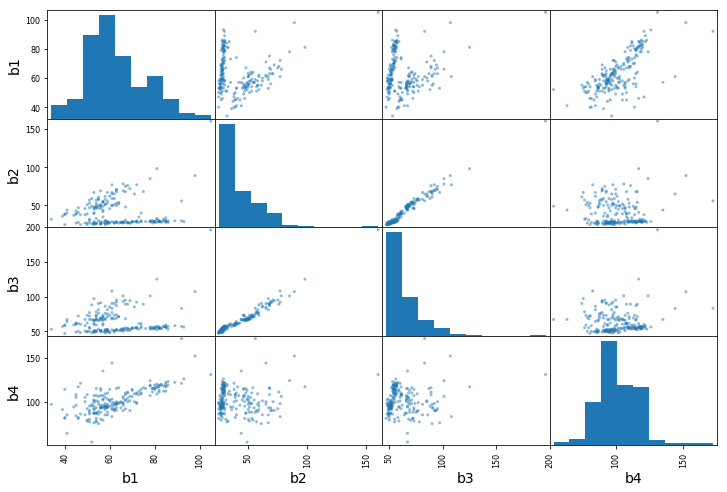

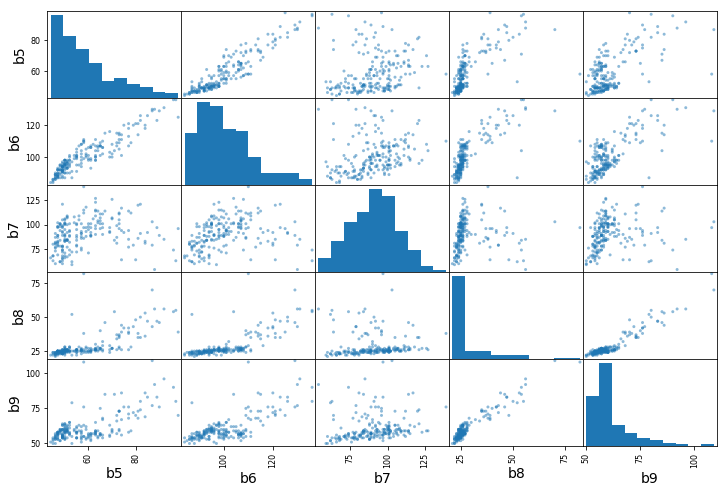

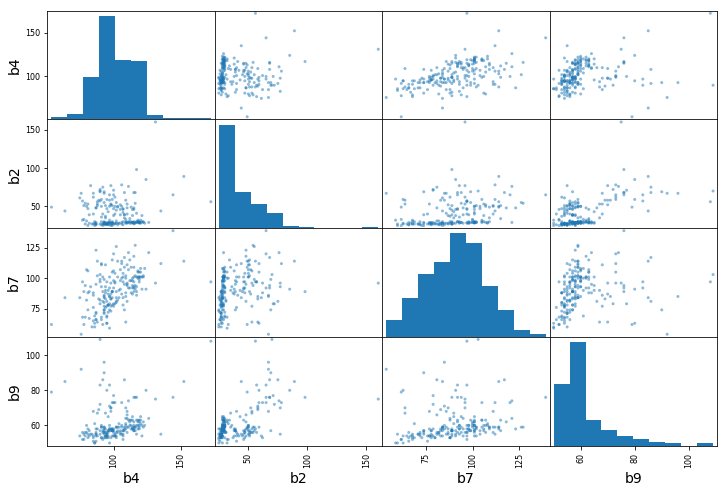

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["b1", "b2", "b3",
              "b4"]
scatter_matrix(training_data[attributes], figsize=(12, 8))

attributes = ["b5", "b6", "b7",
              "b8", "b9"]
scatter_matrix(training_data[attributes], figsize=(12, 8))
plt.show()

attributes = ["b4", "b2", "b7", "b9"]
scatter_matrix(training_data[attributes], figsize=(12, 8))
plt.show()


## Task 2: Simplify calssification by dropping unwanted columns

Extract the wanted features (b1 - b9) from the raw data.
Extract the labels from the raw data (will be used when we train our features against the labels).

In [9]:
#crop data
training_data = training_data[["class", "b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b9"]]
testing_data = testing_data[["class", "b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b9"]]
#extract labesl
testing_data_labels = testing_data["class"];
training_data_labels = training_data["class"]

In [10]:
training_data.head() #confirm that it cropped

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59


In [11]:
testing_data.head() #confirm that it cropped

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


## Task 3: Counting number of class instances

A large concern when training data is to overfit to a certain class due to imbalanced data. We will count the amount of each class in the training and testing data.

In [12]:
training_data["class"].value_counts()

s    59
d    54
h    48
o    37
Name: class, dtype: int64

In [13]:
testing_data["class"].value_counts() 

s    136
d    105
o     46
h     38
Name: class, dtype: int64

## Do we have an imbalanced training set.

There is a small imbalance between the the most common class 's' and the least common 'o' with a ratio roughtly 5:3. This is the biggest imbalance so overall the training set is reasonably balanced. 

When we analyse the results we will not be using 'accuracy' by itself to make an assessment of how well the classifiers worked. This will help combat any any imbalance, especially since the testing set has a large imbalance towards 's'. So if we use a 'base estimator' that guesses all samples are on 's' it will score around 42% on the testing data (much higher than 25%).

## Taks 4: Normalise Data

Our features have means ranging from 28 to 100 and standard deviations from 8 to 18. To prevent any features from skewing our estimations we will use sklearns "StandardardScaler" to normalise our data (both training and testing data ).



In [14]:
#instansiate the scaler.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [15]:
#scale the numerical data, both the testing/training

training_data_num = training_data.drop("class", axis = 1)
training_data_scaled = pipeline.fit_transform(training_data_num)

testing_data_num = testing_data.drop("class", axis = 1)
testing_data_scaled = pipeline.transform(testing_data_num) #NOTE ONLY TRANSFORM THE TESTING DATA 
testing_data_num.shape

C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


(325, 9)

## Task 5: 
#### "Use the stochastic gradient descent classifier to perform one-versus-all binary classification on the 4 class labels."

We will train 4 binary classfiers (one versus all), and check the performance for each. Then train a model that would use 4 classifiers to do a multiclass prediction (still using one-versus-all strategy). The "OneVsRestClassifier" package will be used for the last part. This could also be done manually, when predicting a class we would run the data through all 4 binary classifiers and pick the result that gives the highest percentage of being 'that class'.

Some fine-tuning was done on the hyperparamaters, for each model the results before and after the finetuning will be displayed. Not these fine tuning was done with cross validation of the training set against itself (otherwise if it was done against the testing set, the testing set would have been use to 'train' the data and it would not be a fair assessment)

To measure the preformance on the models we looked at the confusion matrices and f1 scores. These are good indication at the performance as it highlights both the False Positives and False Negatives of our classifications. 

In [16]:
testing_data_labels_o = (testing_data_labels == 'o')
training_data_labels_o = (training_data_labels == 'o')

testing_data_labels_s = (testing_data_labels == 's')
training_data_labels_s = (training_data_labels == 's')

testing_data_labels_d = (testing_data_labels == 'd')
training_data_labels_d = (training_data_labels == 'd')

testing_data_labels_h = (testing_data_labels == 'h')
training_data_labels_h = (training_data_labels == 'h')

In [17]:
from sklearn.linear_model import SGDClassifier

bin_clf_o = SGDClassifier(max_iter=5, tol=-np.inf, random_state=7)
bin_clf_s = SGDClassifier(max_iter=5, tol=-np.inf, random_state=7)
bin_clf_d = SGDClassifier(max_iter=5, tol=-np.inf, random_state=7)
bin_clf_h = SGDClassifier(max_iter=5, tol=-np.inf, random_state=7)

bin_clf_o1 = SGDClassifier(max_iter=1000, tol=1, random_state=7)
bin_clf_s1 = SGDClassifier(max_iter=1000, tol=0.1, random_state=7)
bin_clf_d1 = SGDClassifier(max_iter=1000, tol=-np.inf, random_state=7)
bin_clf_h1 = SGDClassifier(max_iter=1000, tol=0.1, random_state=7)

bin_clf_o.fit(training_data_scaled, training_data_labels_o)
bin_clf_s.fit(training_data_scaled, training_data_labels_s) 
bin_clf_d.fit(training_data_scaled, training_data_labels_d) 
bin_clf_h.fit(training_data_scaled, training_data_labels_h) 

bin_clf_o1.fit(training_data_scaled, training_data_labels_o)
bin_clf_s1.fit(training_data_scaled, training_data_labels_s) 
bin_clf_d1.fit(training_data_scaled, training_data_labels_d) 
bin_clf_h1.fit(training_data_scaled, training_data_labels_h) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=7, shuffle=True, tol=0.1,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
predict_testing_o = bin_clf_o.predict(testing_data_scaled)
predict_testing_s = bin_clf_s.predict(testing_data_scaled)
predict_testing_d = bin_clf_d.predict(testing_data_scaled)
predict_testing_h = bin_clf_h.predict(testing_data_scaled)

predict_testing_o1 = bin_clf_o1.predict(testing_data_scaled)
predict_testing_s1 = bin_clf_s1.predict(testing_data_scaled)
predict_testing_d1 = bin_clf_d1.predict(testing_data_scaled)
predict_testing_h1 = bin_clf_h1.predict(testing_data_scaled)

In [19]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score

print("The confusion matrix for o vs rest \n")
print(confusion_matrix(testing_data_labels_o, predict_testing_o))
print("f1 score :",f1_score(testing_data_labels_o, predict_testing_o))
print("\nThe confusion matrix for o vs rest fine-tuned\n")
print(confusion_matrix(testing_data_labels_o, predict_testing_o1))
print("f1 score :",f1_score(testing_data_labels_o, predict_testing_o1))

print("\n\nThe confusion matrix for s vs rest \n")
print(confusion_matrix(testing_data_labels_s, predict_testing_s))
print("f1 score :",f1_score(testing_data_labels_s, predict_testing_s))
print("\nThe confusion matrix for s vs rest fine-tuned\n")
print(confusion_matrix(testing_data_labels_s, predict_testing_s1))
print("f1 score :",f1_score(testing_data_labels_s, predict_testing_s1))

print("\n\nThe confusion matrix for d vs rest \n")
print(confusion_matrix(testing_data_labels_d, predict_testing_d))
print("f1 score :",f1_score(testing_data_labels_d, predict_testing_d))
print("\nThe confusion matrix for d vs rest fine-tuned\n")
print(confusion_matrix(testing_data_labels_d, predict_testing_d1))
print("f1 score :",f1_score(testing_data_labels_d, predict_testing_d1))

print("\n\nThe confusion matrix for h vs rest \n")
print(confusion_matrix(testing_data_labels_h, predict_testing_h))
print("f1 score :",f1_score(testing_data_labels_h, predict_testing_h))
print("\nThe confusion matrix for h vs rest fine-tuned\n")
print(confusion_matrix(testing_data_labels_h, predict_testing_h1))
print("f1 score :",f1_score(testing_data_labels_h, predict_testing_h1))

The confusion matrix for o vs rest 

[[267  12]
 [  9  37]]
f1 score : 0.7789473684210526

The confusion matrix for o vs rest fine-tuned

[[271   8]
 [  9  37]]
f1 score : 0.8131868131868132


The confusion matrix for s vs rest 

[[172  17]
 [ 37  99]]
f1 score : 0.7857142857142856

The confusion matrix for s vs rest fine-tuned

[[167  22]
 [ 28 108]]
f1 score : 0.8120300751879699


The confusion matrix for d vs rest 

[[209  11]
 [ 28  77]]
f1 score : 0.7979274611398963

The confusion matrix for d vs rest fine-tuned

[[201  19]
 [ 20  85]]
f1 score : 0.8133971291866029


The confusion matrix for h vs rest 

[[268  19]
 [  3  35]]
f1 score : 0.7608695652173912

The confusion matrix for h vs rest fine-tuned

[[281   6]
 [  7  31]]
f1 score : 0.8266666666666665


In [20]:
from sklearn.multiclass import OneVsRestClassifier
ova_clf = OneVsRestClassifier(SGDClassifier(max_iter=1000, tol=-np.inf, random_state = 17))
ova_clf.fit(training_data_scaled, training_data_labels)
predict_testing = ova_clf.predict(testing_data_scaled)

one_v_all_matrix = confusion_matrix(testing_data_labels, predict_testing)
print(one_v_all_matrix)
print("f1 score :",f1_score(testing_data_labels_d, predict_testing_d1))


[[ 86   3   8   8]
 [  0  30   0   8]
 [  8   0  35   3]
 [  4  14   0 118]]
f1 score : 0.8133971291866029


## Task 6: 
#### Train a logistic regression classifier for multi-class classification with the Softmax function.

Using the "multinomial" hyper-paramater on the LogisitcRegression we train a classifier to use the softmax function for multiclass classification. Playing around with hyper-paramaters such as 'C' value and solver algorithms to fine tune the model. Again this was cross_val_predict was used against the training data for the fine tuning. 

In [21]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(max_iter=100, multi_class="multinomial",solver="lbfgs", C=5) 
softmax_reg.fit(training_data_scaled, training_data_labels)

predict_testing = softmax_reg.predict(testing_data_scaled)

softmax_matrix = confusion_matrix(testing_data_labels, predict_testing)

print(softmax_matrix)                                  
print(f1_score(testing_data_labels, predict_testing, average='micro'))


[[ 82   3   9  11]
 [  0  30   0   8]
 [  8   0  34   4]
 [  2   8   0 126]]
0.8369230769230769


## Task 7: 

The Logistic Regression performed slightly better than the stochastic gradient descent classifier, having a larger F1 score. The f1 score combines the precision and recall into one metric (harmonic mean of the two). Below is a visualisation of the confusion matrices. Since they are very close together a big difference can not be seen. 

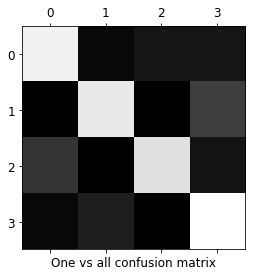

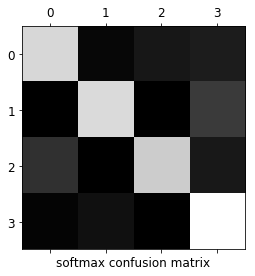

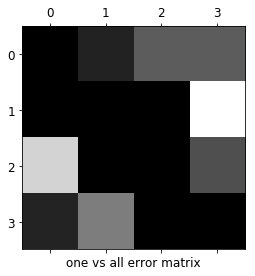

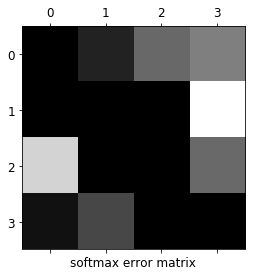

In [22]:
one_v_all_matrix = one_v_all_matrix.astype('float') / one_v_all_matrix.sum(axis=1)[:, np.newaxis]
plt.matshow(one_v_all_matrix, cmap=plt.cm.gray)
plt.title("One vs all confusion matrix", y=-0.1)

softmax_matrix  = softmax_matrix .astype('float') / softmax_matrix.sum(axis=1)[:, np.newaxis]
plt.matshow(softmax_matrix , cmap=plt.cm.gray)
plt.title("softmax confusion matrix", y=-0.1)

row_sums = one_v_all_matrix.sum(axis=1, keepdims=True)
norm_one_v_all = one_v_all_matrix/ row_sums
np.fill_diagonal(norm_one_v_all, 0)
plt.matshow(norm_one_v_all, cmap=plt.cm.gray)
plt.title("one vs all error matrix", y=-0.1)

row_sums = softmax_matrix .sum(axis=1, keepdims=True)
norm_softmax = softmax_matrix / row_sums
np.fill_diagonal(norm_softmax, 0)
plt.matshow(norm_softmax, cmap=plt.cm.gray)
plt.title("softmax error matrix", y=-0.1)
plt.show()
